Mounted at /content/drive


[Errno 20] Not a directory: '/content/drive/MyDrive/T1_and_T2_weighted_training_images.zip'
/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Connecting my collab notebook with Google drive as my whole dataset of MRI images are present in google drive

In [ ]:
!pip install patchify
!pip install tensorflow
!pip install segmentation_models_3D

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 KB 8.4 MB/s eta 0:00:00


In [ ]:
import matplotlib
from matplotlib import pylab as plt
import nibabel as nib
import os
import numpy as np
import pandas as pd
from patchify import patchify,unpatchify
from tensorflow import keras
import tensorflow
import tensorflow as tf
from sklearn.model_selection import train_test_split
import segmentation_models_3D as sm

Segmentation Models: using `tf.keras` framework.


walking thorugh my drive content path, here it contains the list contaaining all the images path

In [ ]:
t1_img_path=os.listdir("/content/drive/MyDrive/mri/t1")
t2_img_path=os.listdir("/content/drive/MyDrive/mri/t2")


we need to make sure that the corresponding to T1 image , we are providing the matching T2 image, so we achieved this goal by sorting our data with respect to the name of the image file.

In [ ]:
t1_img_path.sort()
# print(t1_img_path)
t2_img_path.sort()
# print(t2_img_path)

Breaking our Data into train and testing , out of 28 total images of both T1 and T2 ; 24 images of T1 and T2 will be used for training purpose and 4 images of T1 and T2 images will be used for Testing purpose 

In [ ]:
t1=t1_img_path[:24]
t2=t2_img_path[:24]
t1_test=t1_img_path[24:28]
t2_test=t2_img_path[24:28]

In [ ]:
print(t1)
print(t2)

['IXI102-HH-1416-T1_fcm.nii.gz', 'IXI104-HH-1450-T1_fcm.nii.gz', 'IXI105-HH-1471-T1_fcm.nii.gz', 'IXI126-HH-1437-T1_fcm.nii.gz', 'IXI127-HH-1451-T1_fcm.nii.gz', 'IXI128-HH-1470-T1_fcm.nii.gz', 'IXI130-HH-1528-T1_fcm.nii.gz', 'IXI131-HH-1527-T1_fcm.nii.gz', 'IXI132-HH-1415-T1_fcm.nii.gz', 'IXI136-HH-1452-T1_fcm.nii.gz', 'IXI137-HH-1472-T1_fcm.nii.gz', 'IXI146-HH-1389-T1_fcm.nii.gz', 'IXI148-HH-1453-T1_fcm.nii.gz', 'IXI150-HH-1550-T1_fcm.nii.gz', 'IXI159-HH-1549-T1_fcm.nii.gz', 'IXI160-HH-1637-T1_fcm.nii.gz', 'IXI161-HH-2533-T1_fcm.nii.gz', 'IXI162-HH-1548-T1_fcm.nii.gz', 'IXI163-HH-1621-T1_fcm.nii.gz', 'IXI165-HH-1589-T1_fcm.nii.gz', 'IXI167-HH-1569-T1_fcm.nii.gz', 'IXI168-HH-1607-T1_fcm.nii.gz', 'IXI173-HH-1590-T1_fcm.nii.gz', 'IXI174-HH-1571-T1_fcm.nii.gz']
['IXI102-HH-1416-T2_reg_fcm.nii.gz', 'IXI104-HH-1450-T2_reg_fcm.nii.gz', 'IXI105-HH-1471-T2_reg_fcm.nii.gz', 'IXI126-HH-1437-T2_reg_fcm.nii.gz', 'IXI127-HH-1451-T2_reg_fcm.nii.gz', 'IXI128-HH-1470-T2_reg_fcm.nii.gz', 'IXI130-HH-152

In [ ]:
print(t1_test)
print(t2_test)

['IXI175-HH-1570-T1_fcm.nii.gz', 'IXI176-HH-1604-T1_fcm.nii.gz', 'IXI180-HH-1605-T1_fcm.nii.gz', 'IXI195-HH-1620-T1_fcm.nii.gz']
['IXI175-HH-1570-T2_reg_fcm.nii.gz', 'IXI176-HH-1604-T2_reg_fcm.nii.gz', 'IXI180-HH-1605-T2_reg_fcm.nii.gz', 'IXI195-HH-1620-T2_reg_fcm.nii.gz']


In [ ]:
t1_img_dir="/content/drive/MyDrive/mri/t1/"
t2_img_dir="/content/drive/MyDrive/mri/t2/"

our images has dimension of 120 x 120 x 90, which is usually very large in size for training purpose , hence we will make small patches out of it of dimension 32 x 32 x 32 , from one image of 120 x 120 x 90 , we will get 75 patches having dimension 32 x 32 x 32 with overlapping step size 22

In [ ]:
def patch(img):
  patch_images=[]
  patches=patchify(img,(32,32,32),step=22)
  patch_images.append(patches)
  # print("patching shape",patches.shape)
  return patch_images

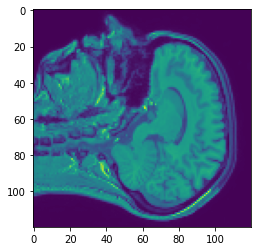

In [ ]:
arr=nib.load(t1_img_dir + t1_img_path[0]).get_fdata()
plt.imshow(arr[:,:,50])
plt.show()

In [ ]:
# arr=nib.load(t2_img_dir + t2_img_path[0]).get_fdata()
# plt.imshow(arr[:,:,50])
# plt.show()

maintaining image shape is a very signifiacnt step as our U-net (3D convolutional model) demands particular fix input size and aslo converting our grey scale image into RGB format using stack process

In [ ]:
def image_resize(img):
  resized_img=np.reshape(img,(-1,32,32,32))
  print("resized image",resized_img.shape)
  images=np.stack((resized_img,)*3,axis=-1)
  print("stackimage size",images.shape)
  return images

A function defined to provide T1 images

In [ ]:
def load_img_t1(img_dir,img_list):
  t1_images_test=[]
  for i,image_number in enumerate(img_list):
    # print(img_list)
    t1_images_test.append(nib.load(img_dir + img_list[i]).get_fdata())
    # print("valuee of t1 ",i)
    t1_img=np.array(t1_images_test)
  yield t1_img
  # print(t1_img.shape)
  # return t1_img

A function defined to provide T1 testing images

In [ ]:
def t1_load_test(img_dir,img_list):
  t1_images_test=[]
  for i,image_number in enumerate(img_list):
    t1_images_test.append(nib.load(img_dir + img_list[i]).get_fdata())
    t1_test=np.array(t1_images_test)
  return t1_test

A function defined to provide T2 testing images


In [ ]:
def t2_load_test(img_dir,img_list):
  t2_images_test=[]
  for i,image_number in enumerate(img_list):
    t2_images_test.append(nib.load(img_dir + img_list[i]).get_fdata())
    t2_test=np.array(t2_images_test)
  return t2_test

A function defined to provide T2 images

In [ ]:
def load_img_t2(img_dir,img_list):
  t2_images=[]
  for i,image_number in enumerate(img_list):
    # print(img_list)
    t2_images.append(nib.load(img_dir + img_list[i]).get_fdata())
    # print("value of image t2",i)
    t2_img=np.array(t2_images)
  yield t2_img
  

Imageloader is an user defined function for the purpose of providing all the patched images of 24 training images, each training image has been patchified into 75 patches, so 24 images will be transformed into 75 x 24=1800 number of patches, each patches having 32,32,32 dimension and 3 rgb channel

In [ ]:
def imageloader(t1_img_dir,t1_img_path,t2_img_dir,t2_img_path,batch_size):

    L=len(t1_img_path)
    t1_patched_image=[]
    t2_patched_image=[]
    batch_start=0
    batch_end=batch_size

    
    X=load_img_t1(t1_img_dir,t1_img_path)
    X=X.__next__()
    for i in range(X.shape[0]):
      t1_patched_image.append(patch(X[i,:,:,:]))

          

    Y=load_img_t2(t2_img_dir,t2_img_path)
    Y=Y.__next__()
    for j in range(Y.shape[0]):
      t2_patched_image.append(patch(Y[j,:,:,:]))
      
    t1_patches=np.array(t1_patched_image)
    t2_patches=np.array(t2_patched_image)
      # print("t1 patches shape",t1_patches.shape)
      # print("t2 patches shape",t2_patches.shape)
        
    t1_resize=image_resize(t1_patches)
    t2_resize=image_resize(t2_patches)
    print(t1_resize.shape)      
    print(t2_resize.shape)
    
    return t1_resize,t2_resize
      
      # t1_resize=image_resize(t1_patched)
     
     
      
      # t2_patched=patch(Y)
      # t2_resize=image_resize(t2_patched)

      # print("X.shape",t1_resize.shape)
      # print("Y.shape",t2_resize.shape)


      
      # return t1_resize.shape,t2_resize.shape
      

In [ ]:
# print(a)
# print(a)
t1_resize,t2_resize=imageloader(t1_img_dir,t1,t2_img_dir,t2,1)

resized image (1800, 32, 32, 32)
stackimage size (1800, 32, 32, 32, 3)
resized image (1800, 32, 32, 32)
stackimage size (1800, 32, 32, 32, 3)
(1800, 32, 32, 32, 3)
(1800, 32, 32, 32, 3)


spliting our Training images data into training and cross validation data to view our training images. The important thing to note here is , for now , in this module we are using T1 images as features and T2 images as Labels to predict , but the vice verca is also true which will be implemented in the further upcoming modules

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(t1_resize,t2_resize,test_size=0.1,random_state=0)

Make sure of the dimension of the image, as it is required to input correct dimension of the image

In [ ]:
print("xtrain", X_train.shape)
print("X_test", X_test.shape)
print("ytrain", y_train.shape)
print("Y_test", y_test.shape)
print(X_train.shape[0])

xtrain (1620, 32, 32, 32, 3)
X_test (180, 32, 32, 32, 3)
ytrain (1620, 32, 32, 32, 3)
Y_test (180, 32, 32, 32, 3)
1620




*   3D convolutions applies a 3 dimentional filter to the dataset and the filter moves 3-direction (x, y, z) to calcuate the low level feature representations. Their output shape is a 3 dimentional volume space such as cube or cuboid. 

*   Convolutions are filter (matrix / vectors) with learnable parameters that are used to extract low-dimentional features from an input data.
They have the property to preserve the spatial or positional relationships between input data points

*   Building a 3D convolutional model (U-net) for image segmenatation with Kearas library and using its several functions like Conv3DTranspose,BatchNormalisation,Maxpooling and etc.





In [ ]:
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, UpSampling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate

def conv_block(input, num_filters):
    x = Conv3D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   
    x = Activation("relu")(x)

    x = Conv3D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  
    x = Activation("relu")(x)

    return x




def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPooling3D((2, 2, 2))(x)
    return x, p   



def decoder_block(input, skip_features, num_filters):
    x = Conv3DTranspose(num_filters, (2, 2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x


def build_unet(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 32)
    s2, p2 = encoder_block(p1, 64)
    s3, p3 = encoder_block(p2, 128)
    s4, p4 = encoder_block(p3, 256)

    b1 = conv_block(p4, 512) 
    
    d1 = decoder_block(b1, s4, 256)
    d2 = decoder_block(d1, s3, 128)
    d3 = decoder_block(d2, s2, 64)
    d4 = decoder_block(d3, s1, 32)

    

    outputs = Conv3D(3, 1, padding="same")(d4)  
   

    model = Model(inputs, outputs, name="U-Net")
    return model

we will be using accuracy, mean_abosolute_error and IOU score to evaluate our model , again its just a hyperparameter, we could just change it and try experimenting with different errors or any other metrics preferable.

In [ ]:
# dice_loss = sm.losses.DiceLoss() 
# focal_loss = sm.losses.CategoricalFocalLoss()
# total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy','mean_absolute_error', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
optim = keras.optimizers.Adam(LR, beta_1=0.9, beta_2=0.999)


*   Building our Unet Model with the size of (32,32,32,3) , make sure it will take a RGB input and process on it , so we need to provide similiar shape of input to our Unet model.

*   Compiling our model with Adam Optimizer, with huberloss along with its hyperparameter , we could actually try different values of hyperparameter to experiment with.



In [ ]:
model = build_unet((32,32,32,3))
model.compile(optimizer = Adam(learning_rate=0.00001), loss=tensorflow.keras.losses.Huber(delta=1.5), metrics=metrics)

print(model.summary())

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 32,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv3d (Conv3D)                (None, 32, 32, 32,   2624        ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 32,   128        ['conv3d[0][0]']                 
 alization)                     32)                                                           

Fit our model with X_train,y_train with 30  batch_size and running it for multiple epochs can actually improve the training of our data and can provide a better prediction.

In [ ]:
history=model.fit(X_train, 
          y_train,
          batch_size=30, 
          epochs=30,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/30
54/54 [==============================] - 49s 630ms/step - loss: 0.9820 - accuracy: 0.6891 - mean_absolute_error: 1.2079 - iou_score: 0.1169 - val_loss: 0.4374 - val_accuracy: 0.2370 - val_mean_absolute_error: 0.6492 - val_iou_score: 2.0691e-11
Epoch 2/30
54/54 [==============================] - 33s 620ms/step - loss: 0.7606 - accuracy: 0.7539 - mean_absolute_error: 1.0254 - iou_score: 0.1260 - val_loss: 0.4914 - val_accuracy: 0.6729 - val_mean_absolute_error: 0.7242 - val_iou_score: 2.0691e-11
Epoch 3/30
54/54 [==============================] - 33s 603ms/step - loss: 0.5130 - accuracy: 0.7392 - mean_absolute_error: 0.7898 - iou_score: 0.1726 - val_loss: 0.4818 - val_accuracy: 0.8102 - val_mean_absolute_error: 0.7275 - val_iou_score: 4.7757e-05
Epoch 4/30
54/54 [==============================] - 33s 608ms/step - loss: 0.3840 - accuracy: 0.7142 - mean_absolute_error: 0.6481 - iou_score: 0.2494 - val_loss: 0.4421 - val_accuracy: 0.8274 - val_mean_absolute_error: 0.6975 - val_io

Plotting Accuracy, loss and IOU score with respect to epochs trained, again the number of epochs to be trained is purely custom input and can only be determined  by trying diiferent values to it.

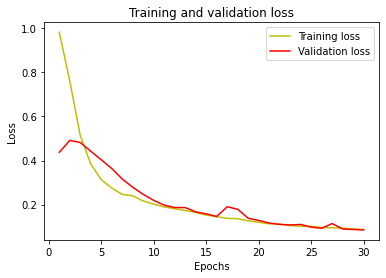

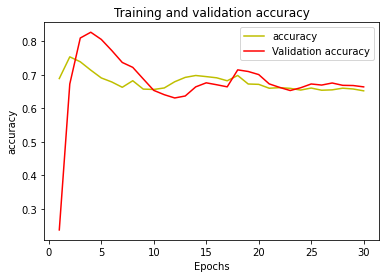

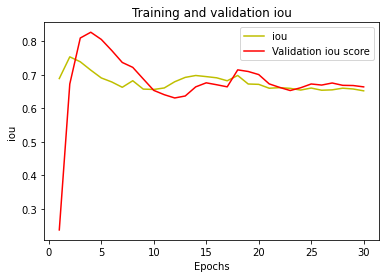

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

iou = history.history['iou_score']
val_iou_score = history.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='iou')
plt.plot(epochs, val_acc, 'r', label='Validation iou score')
plt.title('Training and validation iou')
plt.xlabel('Epochs')
plt.ylabel('iou')
plt.legend()
plt.show()



*   So, now as our model is trained on 1800 patches , its time to predict and test our model, so here we will be using our remaining  4 images kept aside for testing purpose
*   changing it into same (32,32,32) shape , will provide us 75 patches of each images , so 4 x 75 = 300 patches for testing purpose.


In [ ]:
x_test=t1_load_test(t1_img_dir,t1_test)
t1_test_patches=[]
for i in range(x_test.shape[0]):

  t1_test_patches.append(patch(x_test[i,:,:,:]))
  
t1_patch=np.array(t1_test_patches)

# t1_test_resize=image_resize(t1_patch)
print(t1_patch.shape)
# t1_patch=np.reshape(t1_patch,(-1,32,32,32))
# print(t1_patch.shape)

(4, 1, 5, 5, 3, 32, 32, 32)


In [ ]:
y_test=t2_load_test(t2_img_dir,t2_test)
t2_test_patches=[]
for i in range(y_test.shape[0]):

  t2_test_patches.append(patch(y_test[i,:,:,:]))
  
t2_patch=np.array(t2_test_patches)
print(t2_patch.shape)
# t2_test_resize=image_resize(t2_patch)

print("final",t2_patch.shape)

(4, 1, 5, 5, 3, 32, 32, 32)
final (4, 1, 5, 5, 3, 32, 32, 32)


prediction on each patch , converted into RGB format and prediciton on it

In [ ]:
predicted_patches=[]
count=0
for i in range(t1_patch.shape[0]):
  for j in range(t1_patch.shape[1]):
    for k in range(t1_patch.shape[2]):
      for l in range(t1_patch.shape[3]):
        for m in range(t1_patch.shape[4]):
          single_patch=t1_patch[i,j,k,l,m,:,:,:]
          single_patch_3ch = np.stack((single_patch,)*3, axis=-1)
          print(single_patch_3ch.shape)
          print("single_patch_3ch",single_patch_3ch.shape)
        # single_patch_3ch = single_patch_3ch/255.
          single_patch_3ch_input = np.expand_dims(single_patch_3ch, axis=0)
          print("expand dims",single_patch_3ch_input.shape)
          count+=1
          print("arrrr",count)
          single_patch_prediction = model.predict(single_patch_3ch_input)
          single_patch_prediction_argmax = np.argmax(single_patch_prediction, axis=4)[0,:,:,:]
          print("single patch_prediciton argmax",single_patch_prediction_argmax.shape)
          predicted_patches.append(single_patch_prediction_argmax)




(32, 32, 32, 3)
single_patch_3ch (32, 32, 32, 3)
expand dims (1, 32, 32, 32, 3)
arrrr 1
1/1 [==============================] - 2s 2s/step
single patch_prediciton argmax (32, 32, 32)
(32, 32, 32, 3)
single_patch_3ch (32, 32, 32, 3)
expand dims (1, 32, 32, 32, 3)
arrrr 2
1/1 [==============================] - 0s 47ms/step
single patch_prediciton argmax (32, 32, 32)
(32, 32, 32, 3)
single_patch_3ch (32, 32, 32, 3)
expand dims (1, 32, 32, 32, 3)
arrrr 3
1/1 [==============================] - 0s 32ms/step
single patch_prediciton argmax (32, 32, 32)
(32, 32, 32, 3)
single_patch_3ch (32, 32, 32, 3)
expand dims (1, 32, 32, 32, 3)
arrrr 4
1/1 [==============================] - 0s 47ms/step
single patch_prediciton argmax (32, 32, 32)
(32, 32, 32, 3)
single_patch_3ch (32, 32, 32, 3)
expand dims (1, 32, 32, 32, 3)
arrrr 5
1/1 [==============================] - 0s 35ms/step
single patch_prediciton argmax (32, 32, 32)
(32, 32, 32, 3)
single_patch_3ch (32, 32, 32, 3)
expand dims (1, 32, 32, 32, 3)
ar

In [ ]:
predicted_patches=np.array(predicted_patches)
print("predicted_array",predicted_patches.shape)

predicted_array (300, 32, 32, 32)


In [ ]:
predicted_patches_reshaped = np.reshape(predicted_patches, 
                                        (t1_patch.shape[0], t1_patch.shape[1], t1_patch.shape[2],
                                         t1_patch.shape[3], t1_patch.shape[4], t1_patch.shape[5],t1_patch.shape[6],t1_patch.shape[7]))
print(predicted_patches_reshaped.shape)

(4, 1, 5, 5, 3, 32, 32, 32)


In [ ]:
predicted_patches_reshaped=np.reshape(predicted_patches_reshaped,(-1,5,5,3,32,32,32))
print(predicted_patches_reshaped.shape)

(4, 5, 5, 3, 32, 32, 32)


In [ ]:
final_img=[]
for i in range(t1_patch.shape[0]):
  reconstructed_image = unpatchify(predicted_patches_reshaped[i,:,:,:,:,:,:], (120,120,90))
  final_img.append(reconstructed_image)
  print(reconstructed_image.shape)
  # print(test_img.shape)

(120, 120, 90)
(120, 120, 90)
(120, 120, 90)
(120, 120, 90)


Our numpy array is in int64 datatype , which is not supported by many system for viewing purpose, so we shall be transforming  into uint8 so its easy for viewing

In [ ]:
final_img=np.array(final_img)
print(final_img.dtype)

int64


In [ ]:
final_img=final_img.astype(np.uint8)
print(final_img.dtype)

uint8


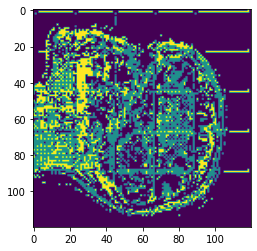

In [ ]:
plt.imshow(final_img[2,:,:,40])
plt.show()